In [181]:
# Dependencies and Setup
import hvplot.pandas
import holoviews


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import geoapify_key


In [182]:
hap_df = pd.read_csv('./Resources/2022.csv', encoding='utf-8')

cost_df = pd.read_csv('./Resources/Cost_of_Living_Index_2022.csv', encoding='utf-8')

print(hap_df.head())
print(cost_df.head())

   RANK      Country Happiness score Whisker-high Whisker-low  \
0     1      Finland           7,821        7,886       7,756   
1     2      Denmark           7,636        7,710       7,563   
2     3      Iceland           7,557        7,651       7,464   
3     4  Switzerland           7,512        7,586       7,437   
4     5  Netherlands           7,415        7,471       7,359   

  Dystopia (1.83) + residual Explained by: GDP per capita  \
0                      2,518                        1,892   
1                      2,226                        1,953   
2                      2,320                        1,936   
3                      2,153                        2,026   
4                      2,137                        1,945   

  Explained by: Social support Explained by: Healthy life expectancy  \
0                        1,258                                 0,775   
1                        1,243                                 0,777   
2                        1

In [183]:
# Merging
mHapCost_df = hap_df.merge(cost_df, how='inner', on='Country')
mHapCost_df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534",41,73.20,25.95,51.05,65.16,77.65,91.02
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532",33,84.12,33.23,60.26,68.60,98.75,99.45
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191",52,94.86,41.93,70.05,90.22,99.42,77.06
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461",120,123.35,53.54,90.62,128.13,122.09,118.44
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419",86,75.66,36.06,57.10,65.49,76.35,87.99


In [184]:
mHapCost_df.count()

RANK                                          106
Country                                       106
Happiness score                               106
Whisker-high                                  106
Whisker-low                                   106
Dystopia (1.83) + residual                    106
Explained by: GDP per capita                  106
Explained by: Social support                  106
Explained by: Healthy life expectancy         106
Explained by: Freedom to make life choices    106
Explained by: Generosity                      106
Explained by: Perceptions of corruption       106
Rank                                          106
Cost of Living Index                          106
Rent Index                                    106
Cost of Living Plus Rent Index                106
Groceries Index                               106
Restaurant Price Index                        106
Local Purchasing Power Index                  106
dtype: int64

In [185]:
capCoord_df = pd.read_csv('./Resources/country-capitals.csv', on_bad_lines='skip', encoding='utf-8')
capCoord_df

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe
...,...,...,...,...,...,...
238,Northern Cyprus,North Nicosia,35.183333,33.366667,NaN,Europe
239,Hong Kong,NaN,0.000000,0.000000,HK,Asia
240,Heard Island and McDonald Islands,NaN,0.000000,0.000000,HM,Antarctica
241,British Indian Ocean Territory,Diego Garcia,-7.300000,72.400000,IO,Africa


In [186]:
mHapCostCoord_df = mHapCost_df.merge(capCoord_df, how='inner', left_on='Country', right_on='CountryName')
mHapCostCoord_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,...,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736",...,51.05,65.16,77.65,91.02,Finland,Helsinki,60.166667,24.933333,FI,Europe
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719",...,60.26,68.60,98.75,99.45,Denmark,Copenhagen,55.666667,12.583333,DK,Europe
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718",...,70.05,90.22,99.42,77.06,Iceland,Reykjavik,64.150000,-21.950000,IS,Europe
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677",...,90.62,128.13,122.09,118.44,Switzerland,Bern,46.916667,7.466667,CH,Europe
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651",...,57.10,65.49,76.35,87.99,Netherlands,Amsterdam,52.350000,4.916667,NL,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,137,Zambia,"3,760","3,902","3,618","1,135","0,930","0,577","0,306","0,525",...,21.90,31.53,22.46,40.33,Zambia,Lusaka,-15.416667,28.283333,ZM,Africa
99,139,Tanzania,"3,702","3,847","3,558","0,735","0,848","0,597","0,425","0,578",...,23.23,30.04,24.86,15.97,Tanzania,Dar es Salaam,-6.800000,39.283333,TZ,Africa
100,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329",...,28.37,39.88,38.13,19.07,Zimbabwe,Harare,-17.816667,31.033333,ZW,Africa
101,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103",...,48.61,66.83,54.25,35.12,Lebanon,Beirut,33.866667,35.500000,LB,Asia


In [187]:
print(mHapCostCoord_df.dtypes)
mHapCostCoord_df['Happiness score'] = mHapCostCoord_df['Happiness score'].str.replace(",", "").astype('float')
mHapCostCoord_df.dtypes


RANK                                            int64
Country                                        object
Happiness score                                object
Whisker-high                                   object
Whisker-low                                    object
Dystopia (1.83) + residual                     object
Explained by: GDP per capita                   object
Explained by: Social support                   object
Explained by: Healthy life expectancy          object
Explained by: Freedom to make life choices     object
Explained by: Generosity                       object
Explained by: Perceptions of corruption        object
Rank                                            int64
Cost of Living Index                          float64
Rent Index                                    float64
Cost of Living Plus Rent Index                float64
Groceries Index                               float64
Restaurant Price Index                        float64
Local Purchasing Power Index

RANK                                            int64
Country                                        object
Happiness score                               float64
Whisker-high                                   object
Whisker-low                                    object
Dystopia (1.83) + residual                     object
Explained by: GDP per capita                   object
Explained by: Social support                   object
Explained by: Healthy life expectancy          object
Explained by: Freedom to make life choices     object
Explained by: Generosity                       object
Explained by: Perceptions of corruption        object
Rank                                            int64
Cost of Living Index                          float64
Rent Index                                    float64
Cost of Living Plus Rent Index                float64
Groceries Index                               float64
Restaurant Price Index                        float64
Local Purchasing Power Index

In [188]:

srt_df= mHapCostCoord_df.sort_values(by='Country')
print(srt_df.head(20))

     RANK      Country  Happiness score Whisker-high Whisker-low  \
102   146  Afghanistan           2404.0        2,469       2,339   
72     90      Albania           5199.0        5,321       5,076   
75     96      Algeria           5122.0        5,215       5,030   
49     57    Argentina           5967.0        6,090       5,844   
68     82      Armenia           5399.0        5,519       5,278   
10     12    Australia           7162.0        7,244       7,081   
9      11      Austria           7163.0        7,237       7,089   
17     21      Bahrain           6647.0        6,779       6,514   
74     94   Bangladesh           5155.0        5,262       5,049   
15     19      Belgium           6805.0        6,890       6,720   
60     71      Bolivia           5600.0        5,709       5,491   
32     38       Brazil           6293.0        6,384       6,202   
70     85     Bulgaria           5371.0        5,485       5,257   
86    114     Cambodia           4640.0        4

In [189]:
# %%capture --no-display

happiestplot = mHapCostCoord_df.hvplot.points(
    "CapitalLongitude",
    "CapitalLatitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness score',
    frame_width = 700,
    frame_height = 600,
    scale=0.1,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)
happiestplot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [CapitalLongitude,CapitalLatitude]   (Country,Happiness score)

In [190]:
top20Hap = mHapCostCoord_df.sort_values('Happiness score', ascending=False).head(20)
top20Hap

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,...,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,1,Finland,7821.0,"7,886","7,756","2,518","1,892","1,258","0,775","0,736",...,51.05,65.16,77.65,91.02,Finland,Helsinki,60.166667,24.933333,FI,Europe
1,2,Denmark,7636.0,"7,710","7,563","2,226","1,953","1,243","0,777","0,719",...,60.26,68.60,98.75,99.45,Denmark,Copenhagen,55.666667,12.583333,DK,Europe
2,3,Iceland,7557.0,"7,651","7,464","2,320","1,936","1,320","0,803","0,718",...,70.05,90.22,99.42,77.06,Iceland,Reykjavik,64.150000,-21.950000,IS,Europe
3,4,Switzerland,7512.0,"7,586","7,437","2,153","2,026","1,226","0,822","0,677",...,90.62,128.13,122.09,118.44,Switzerland,Bern,46.916667,7.466667,CH,Europe
4,5,Netherlands,7415.0,"7,471","7,359","2,137","1,945","1,206","0,787","0,651",...,57.10,65.49,76.35,87.99,Netherlands,Amsterdam,52.350000,4.916667,NL,Europe
5,7,Sweden,7384.0,"7,454","7,315","2,003","1,920","1,204","0,803","0,724",...,50.23,65.78,72.61,98.14,Sweden,Stockholm,59.333333,18.050000,SE,Europe
6,8,Norway,7365.0,"7,440","7,290","1,925","1,997","1,239","0,786","0,728",...,69.86,97.31,105.49,83.11,Norway,Oslo,59.916667,10.750000,NO,Europe
7,9,Israel,7364.0,"7,426","7,301","2,634","1,826","1,221","0,818","0,568",...,62.69,76.72,95.31,75.58,Israel,Jerusalem,31.766667,35.233333,IL,Asia
8,10,New Zealand,7200.0,"7,279","7,120","1,954","1,852","1,235","0,752","0,680",...,55.73,72.04,70.05,83.63,New Zealand,Wellington,-41.300000,174.783333,NZ,Australia
9,11,Austria,7163.0,"7,237","7,089","2,148","1,931","1,165","0,774","0,623",...,50.46,65.88,66.03,77.25,Austria,Vienna,48.200000,16.366667,AT,Europe


In [191]:
top20HapPlot = top20Hap.hvplot.points(
    "CapitalLongitude",
    "CapitalLatitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness score',
    frame_width = 700,
    frame_height = 600,
    scale=0.15,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)
top20HapPlot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [CapitalLongitude,CapitalLatitude]   (Country,Happiness score)

In [192]:
bottom20Hap = mHapCostCoord_df.sort_values('Happiness score').head(20)
bottom20Hap

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,...,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
102,146,Afghanistan,2404.0,"2,469","2,339","1,263","0,758","0,000","0,289","0,000",...,12.09,14.92,12.41,23.04,Afghanistan,Kabul,34.516667,69.183333,AF,Asia
101,145,Lebanon,2955.0,"3,049","2,862","0,216","1,392","0,498","0,631","0,103",...,48.61,66.83,54.25,35.12,Lebanon,Beirut,33.866667,35.500000,LB,Asia
100,144,Zimbabwe,2995.0,"3,110","2,880","0,548","0,947","0,690","0,270","0,329",...,28.37,39.88,38.13,19.07,Zimbabwe,Harare,-17.816667,31.033333,ZW,Africa
99,139,Tanzania,3702.0,"3,847","3,558","0,735","0,848","0,597","0,425","0,578",...,23.23,30.04,24.86,15.97,Tanzania,Dar es Salaam,-6.800000,39.283333,TZ,Africa
98,137,Zambia,3760.0,"3,902","3,618","1,135","0,930","0,577","0,306","0,525",...,21.90,31.53,22.46,40.33,Zambia,Lusaka,-15.416667,28.283333,ZM,Africa
97,136,India,3777.0,"3,828","3,726","0,795","1,167","0,376","0,471","0,647",...,15.47,26.43,17.56,49.72,India,New Delhi,28.600000,77.200000,IN,Asia
96,134,Jordan,4152.0,"4,276","4,029","0,695","1,324","0,724","0,675","0,476",...,30.46,40.81,41.16,31.34,Jordan,Amman,31.950000,35.933333,JO,Asia
95,131,Ethiopia,4241.0,"4,365","4,118","1,375","0,788","0,809","0,457","0,472",...,33.14,36.68,18.03,10.15,Ethiopia,Addis Ababa,9.033333,38.700000,ET,Africa
94,129,Egypt,4288.0,"4,377","4,198","0,856","1,388","0,732","0,548","0,469",...,18.41,27.42,23.42,21.54,Egypt,Cairo,30.050000,31.250000,EG,Africa
93,127,Sri Lanka,4362.0,"4,487","4,237","0,595","1,415","0,934","0,660","0,529",...,20.48,37.67,17.27,19.27,Sri Lanka,Colombo,6.916667,79.833333,LK,Asia


In [193]:
bottom20HapPlot = bottom20Hap.hvplot.points(
    "CapitalLongitude",
    "CapitalLatitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness score',
    frame_width = 700,
    frame_height = 600,
    scale=0.3,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)
bottom20HapPlot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [CapitalLongitude,CapitalLatitude]   (Country,Happiness score)

In [194]:
mHapCostCoord_df.count()

RANK                                          103
Country                                       103
Happiness score                               103
Whisker-high                                  103
Whisker-low                                   103
Dystopia (1.83) + residual                    103
Explained by: GDP per capita                  103
Explained by: Social support                  103
Explained by: Healthy life expectancy         103
Explained by: Freedom to make life choices    103
Explained by: Generosity                      103
Explained by: Perceptions of corruption       103
Rank                                          103
Cost of Living Index                          103
Rent Index                                    103
Cost of Living Plus Rent Index                103
Groceries Index                               103
Restaurant Price Index                        103
Local Purchasing Power Index                  103
CountryName                                   103


In [195]:
crime_df = pd.read_csv('./Resources/WorldCrimeIndex.csv', encoding='utf-8')

crime_df.head()

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29


In [196]:
df = crime_df['City'].str.split(", ", expand=True)
# crime_df.rename(columns={'City':"Country"})
df.head()

,0,1,2
0,Caracas,Venezuela,None
1,Pretoria,South Africa,None
2,Celaya,Mexico,None
3,San Pedro Sula,Honduras,None
4,Port Moresby,Papua New Guinea,None


In [197]:
crime_df['Country'] = df[1]
crime_df.head(30)

,Rank,City,Crime Index,Safety Index,Country
0,1,"Caracas, Venezuela",83.98,16.02,Venezuela
1,2,"Pretoria, South Africa",81.98,18.02,South Africa
2,3,"Celaya, Mexico",81.80,18.20,Mexico
3,4,"San Pedro Sula, Honduras",80.87,19.13,Honduras
4,5,"Port Moresby, Papua New Guinea",80.71,19.29,Papua New Guinea
5,6,"Durban, South Africa",80.60,19.40,South Africa
6,7,"Johannesburg, South Africa",80.55,19.45,South Africa
7,8,"Kabul, Afghanistan",79.39,20.61,Afghanistan
8,9,"Rio de Janeiro, Brazil",77.93,22.07,Brazil
9,10,"Natal, Brazil",77.69,22.31,Brazil


In [198]:

# crime_df.columns=['Crime Rank', 'Country', 'Crime Index', 'Safety Index']
print(crime_df.count())
sr_df = crime_df.sort_values('Country')
print(sr_df.head(20))
# print(crime_df.dtypes)
del crime_df['Rank']
crime_df.head()

Rank            453
City            453
Crime Index     453
Safety Index    453
Country         453
dtype: int64
     Rank                          City  Crime Index  Safety Index  \
54     55        Lethbridge, AB, Canada        63.89         36.11   
67     68  Anchorage, AK, United States        62.27         37.73   
165   166     Tucson, AZ, United States        50.29         49.71   
150   151    Phoenix, AZ, United States        52.23         47.77   
7       8            Kabul, Afghanistan        79.39         20.61   
229   230               Tirana, Albania        44.50         55.50   
129   130              Algiers, Algeria        53.88         46.12   
39     40                Luanda, Angola        67.45         32.55   
76     77            Cordoba, Argentina        60.38         39.62   
16     17            Rosario, Argentina        75.11         24.89   
60     61       Buenos Aires, Argentina        63.33         36.67   
427   428              Yerevan, Armenia        

,City,Crime Index,Safety Index,Country
0,"Caracas, Venezuela",83.98,16.02,Venezuela
1,"Pretoria, South Africa",81.98,18.02,South Africa
2,"Celaya, Mexico",81.80,18.20,Mexico
3,"San Pedro Sula, Honduras",80.87,19.13,Honduras
4,"Port Moresby, Papua New Guinea",80.71,19.29,Papua New Guinea


In [204]:
# dummy_df = mHapCostCoord_df.copy()
# del dummy_df['Rank']
# print(dummy_df.columns)
# print(dummy_df.dtypes)
# dCrime_df = crime_df.copy()
# print(dCrime_df.dtypes)

# mdC_df = dummy_df.merge(dCrime_df, how='inner', on='Country')

mHapCosCrim = mHapCostCoord_df.copy().merge(crime_df, how='inner', on='Country')
print(crime_df.dtypes)
print(mHapCostCoord_df.dtypes)
mHapCosCrim.head()
# mdC_df

# print(dummy_df['Country'].head(15))
# srt = dCrime_df[['Country', 'City']].sort_values(by='Country').head(15)

# srt


City             object
Crime Index     float64
Safety Index    float64
Country          object
dtype: object
RANK                                            int64
Country                                        object
Happiness score                               float64
Whisker-high                                   object
Whisker-low                                    object
Dystopia (1.83) + residual                     object
Explained by: GDP per capita                   object
Explained by: Social support                   object
Explained by: Healthy life expectancy          object
Explained by: Freedom to make life choices     object
Explained by: Generosity                       object
Explained by: Perceptions of corruption        object
Rank                                            int64
Cost of Living Index                          float64
Rent Index                                    float64
Cost of Living Plus Rent Index                float64
Groceries Index           

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,...,Local Purchasing Power Index,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName,City,Crime Index,Safety Index
0,1,Finland,7821.0,"7,886","7,756","2,518","1,892","1,258","0,775","0,736",...,91.02,Finland,Helsinki,60.166667,24.933333,FI,Europe,"Oulu, Finland",36.51,63.49
1,1,Finland,7821.0,"7,886","7,756","2,518","1,892","1,258","0,775","0,736",...,91.02,Finland,Helsinki,60.166667,24.933333,FI,Europe,"Helsinki, Finland",24.92,75.08
2,1,Finland,7821.0,"7,886","7,756","2,518","1,892","1,258","0,775","0,736",...,91.02,Finland,Helsinki,60.166667,24.933333,FI,Europe,"Tampere, Finland",21.86,78.14
3,2,Denmark,7636.0,"7,710","7,563","2,226","1,953","1,243","0,777","0,719",...,99.45,Denmark,Copenhagen,55.666667,12.583333,DK,Europe,"Copenhagen, Denmark",26.67,73.33
4,2,Denmark,7636.0,"7,710","7,563","2,226","1,953","1,243","0,777","0,719",...,99.45,Denmark,Copenhagen,55.666667,12.583333,DK,Europe,"Aalborg, Denmark",25.54,74.46


In [205]:
print(mHapCosCrim.count())
no_na_df = mHapCosCrim.dropna()
no_na_df.count()

RANK                                          367
Country                                       367
Happiness score                               367
Whisker-high                                  367
Whisker-low                                   367
Dystopia (1.83) + residual                    367
Explained by: GDP per capita                  367
Explained by: Social support                  367
Explained by: Healthy life expectancy         367
Explained by: Freedom to make life choices    367
Explained by: Generosity                      367
Explained by: Perceptions of corruption       367
Rank                                          367
Cost of Living Index                          367
Rent Index                                    367
Cost of Living Plus Rent Index                367
Groceries Index                               367
Restaurant Price Index                        367
Local Purchasing Power Index                  367
CountryName                                   367


RANK                                          367
Country                                       367
Happiness score                               367
Whisker-high                                  367
Whisker-low                                   367
Dystopia (1.83) + residual                    367
Explained by: GDP per capita                  367
Explained by: Social support                  367
Explained by: Healthy life expectancy         367
Explained by: Freedom to make life choices    367
Explained by: Generosity                      367
Explained by: Perceptions of corruption       367
Rank                                          367
Cost of Living Index                          367
Rent Index                                    367
Cost of Living Plus Rent Index                367
Groceries Index                               367
Restaurant Price Index                        367
Local Purchasing Power Index                  367
CountryName                                   367


Pearon's R Coefficient: 0.7867064942402682


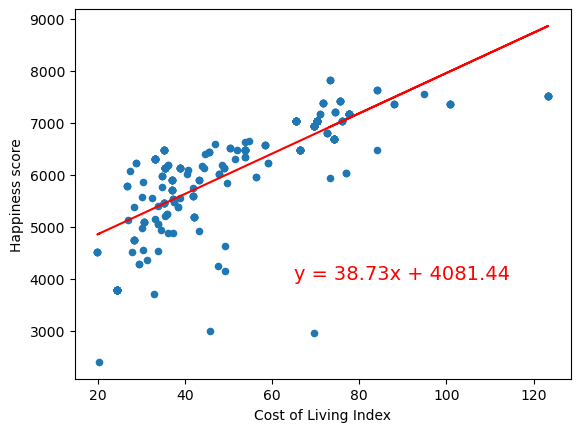

In [216]:
(m, y, r, p, std) = linregress(mHapCosCrim['Cost of Living Index'], mHapCosCrim['Happiness score'])
yregressLin = m * mHapCosCrim['Cost of Living Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Cost of Living Index', y = 'Happiness score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearon's R Coefficient: {r}")
plt.plot(mHapCosCrim['Cost of Living Index'], yregressLin, color='red')
plt.annotate(equation, (65, 4000), color='red', size = 14)
plt.show()

Pearon's R Coefficient: -0.22443473548626408


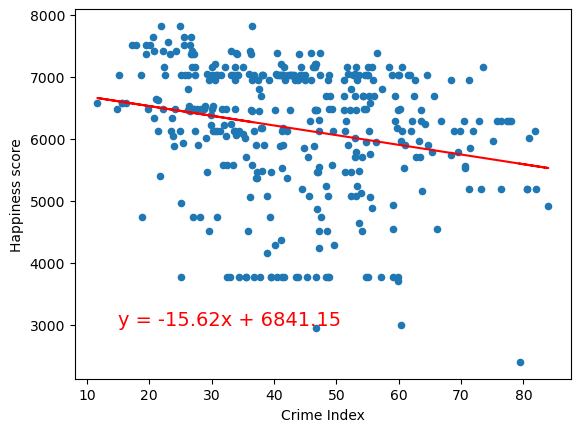

In [218]:
(m, y, r, p, std) = linregress(mHapCosCrim['Crime Index'], mHapCosCrim['Happiness score'])
yregressLin = m * mHapCosCrim['Crime Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Crime Index', y = 'Happiness score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearon's R Coefficient: {r}")
plt.plot(mHapCosCrim['Crime Index'], yregressLin, color='red')
plt.annotate(equation, (15, 3000), color='red', size = 14)
plt.show()

Pearon's R Coefficient: 0.7006491065461644


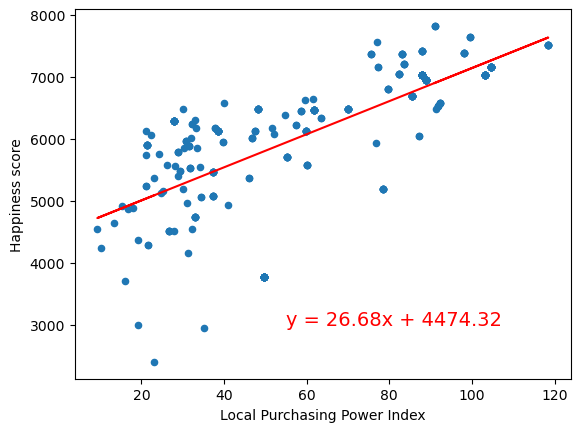

In [220]:
(m, y, r, p, std) = linregress(mHapCosCrim['Local Purchasing Power Index'], mHapCosCrim['Happiness score'])
yregressLin = m * mHapCosCrim['Local Purchasing Power Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Local Purchasing Power Index', y = 'Happiness score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearon's R Coefficient: {r}")
plt.plot(mHapCosCrim['Local Purchasing Power Index'], yregressLin, color='red')
plt.annotate(equation, (55, 3000), color='red', size = 14)
plt.show()

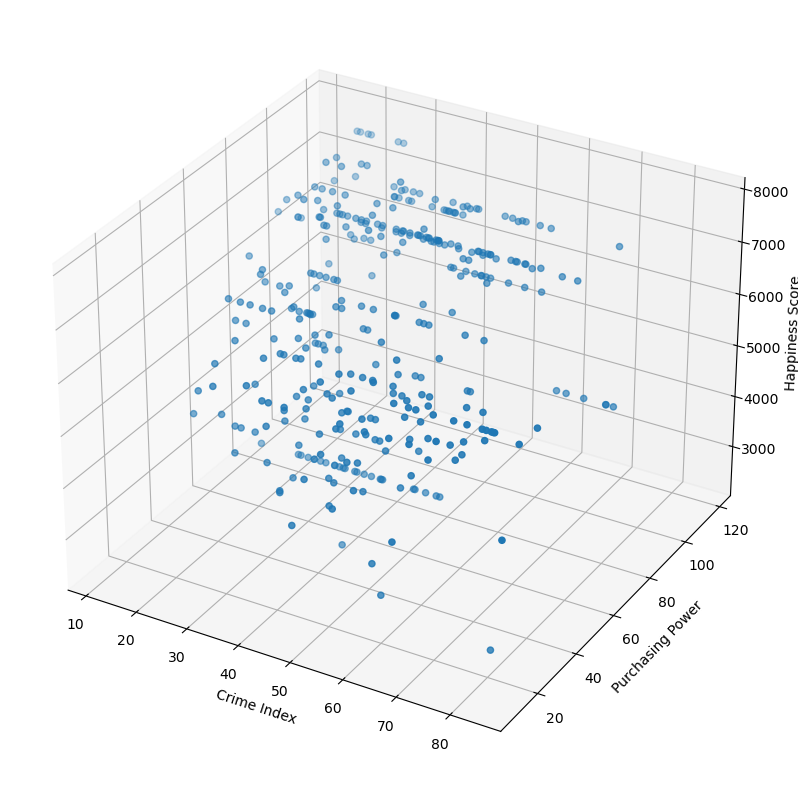

<Figure size 2000x2000 with 0 Axes>

In [251]:
fig = plt.figure(figsize=(10,8), tight_layout=True)
ax = fig.add_subplot(projection='3d')
x = mHapCosCrim['Crime Index']
xlabel = 'Crime Index'
y = mHapCosCrim['Local Purchasing Power Index']
ylabel = 'Purchasing Power'
z = mHapCosCrim['Happiness score']
zlabel = 'Happiness Score'
colors = np.random.rand(367)
bin = [3000, 3500, 4000, 4500, 5000 ]

ax.scatter(x, y, z)#, c=(mHapCosCrim['Crime Index'],mHapCosCrim['Local Purchasing Power Index'],mHapCosCrim['Happiness score']))# xlabel=xlabel, ylabel=ylabel)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
plt.figure(figsize=(20, 20))
plt.subplots_adjust(right=0.5, bottom=0.5)
plt.show()